In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('电力_2.csv')
data = data.iloc[:,1:]
data

,time,value,weather_status,temperature,humidity,wind_speed,wind_level,wind_direction_angle,wind_direction,pressure,visibility,precipitation,light
0,2021/1/1 0:00,3210.842464,1,-8.60,41.00,0.5,0.0,359,6,977.0,9.7,0.0,0.0
1,2021/1/1 0:15,3104.507008,1,-8.88,43.00,0.5,0.0,359,6,977.0,9.7,0.0,0.0
2,2021/1/1 0:30,3037.705984,1,-9.16,45.00,0.5,0.0,359,6,977.0,9.7,0.0,0.0
3,2021/1/1 0:45,2960.176288,1,-9.44,47.00,0.5,0.0,359,6,977.0,9.7,0.0,0.0
4,2021/1/1 1:00,2889.226528,3,-9.70,49.00,0.7,0.0,335,4,976.0,8.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75547,2023/2/26 22:45,5649.941920,1,5.85,64.75,1.6,17.0,250,3,976.0,5.2,0.0,0.0
75548,2023/2/26 23:00,5451.523744,1,5.50,66.00,1.0,0.0,124,1,976.0,4.6,0.0,0.0
75549,2023/2/26 23:15,5246.500000,1,5.15,67.25,1.0,0.0,124,1,976.0,4.6,0.0,0.0
75550,2023/2/26 23:30,5039.924704,1,4.80,68.50,1.0,0.0,124,1,976.0,4.6,0.0,0.0


In [4]:
data = data.rename(columns={'time':'ds','value':'y'})
data['ds'] = pd.to_datetime(data['ds'])
data

,ds,y,weather_status,temperature,humidity,wind_speed,wind_level,wind_direction_angle,wind_direction,pressure,visibility,precipitation,light
0,2021-01-01 00:00:00,3210.842464,1,-8.60,41.00,0.5,0.0,359,6,977.0,9.7,0.0,0.0
1,2021-01-01 00:15:00,3104.507008,1,-8.88,43.00,0.5,0.0,359,6,977.0,9.7,0.0,0.0
2,2021-01-01 00:30:00,3037.705984,1,-9.16,45.00,0.5,0.0,359,6,977.0,9.7,0.0,0.0
3,2021-01-01 00:45:00,2960.176288,1,-9.44,47.00,0.5,0.0,359,6,977.0,9.7,0.0,0.0
4,2021-01-01 01:00:00,2889.226528,3,-9.70,49.00,0.7,0.0,335,4,976.0,8.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75547,2023-02-26 22:45:00,5649.941920,1,5.85,64.75,1.6,17.0,250,3,976.0,5.2,0.0,0.0
75548,2023-02-26 23:00:00,5451.523744,1,5.50,66.00,1.0,0.0,124,1,976.0,4.6,0.0,0.0
75549,2023-02-26 23:15:00,5246.500000,1,5.15,67.25,1.0,0.0,124,1,976.0,4.6,0.0,0.0
75550,2023-02-26 23:30:00,5039.924704,1,4.80,68.50,1.0,0.0,124,1,976.0,4.6,0.0,0.0


In [5]:
data.columns.values

array(['ds', 'y', 'weather_status', 'temperature', 'humidity',
       'wind_speed', 'wind_level', 'wind_direction_angle',
       'wind_direction', 'pressure', 'visibility', 'precipitation',
       'light'], dtype=object)

In [6]:
ra = set(data.columns.values) - set(['ds','y'])
ra

{'humidity',
 'light',
 'precipitation',
 'pressure',
 'temperature',
 'visibility',
 'weather_status',
 'wind_direction',
 'wind_direction_angle',
 'wind_level',
 'wind_speed'}

In [7]:
for i in ra:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())

data

,ds,y,weather_status,temperature,humidity,wind_speed,wind_level,wind_direction_angle,wind_direction,pressure,visibility,precipitation,light
0,2021-01-01 00:00:00,3210.842464,0.000000,0.107914,0.372340,0.037594,0.0,0.997222,0.857143,0.745342,0.321070,0.0,0.0
1,2021-01-01 00:15:00,3104.507008,0.000000,0.102878,0.393617,0.037594,0.0,0.997222,0.857143,0.745342,0.321070,0.0,0.0
2,2021-01-01 00:30:00,3037.705984,0.000000,0.097842,0.414894,0.037594,0.0,0.997222,0.857143,0.745342,0.321070,0.0,0.0
3,2021-01-01 00:45:00,2960.176288,0.000000,0.092806,0.436170,0.037594,0.0,0.997222,0.857143,0.745342,0.321070,0.0,0.0
4,2021-01-01 01:00:00,2889.226528,0.090909,0.088129,0.457447,0.052632,0.0,0.930556,0.571429,0.739130,0.284281,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75547,2023-02-26 22:45:00,5649.941920,0.000000,0.367806,0.625000,0.120301,1.0,0.694444,0.428571,0.739130,0.170569,0.0,0.0
75548,2023-02-26 23:00:00,5451.523744,0.000000,0.361511,0.638298,0.075188,0.0,0.344444,0.142857,0.739130,0.150502,0.0,0.0
75549,2023-02-26 23:15:00,5246.500000,0.000000,0.355216,0.651596,0.075188,0.0,0.344444,0.142857,0.739130,0.150502,0.0,0.0
75550,2023-02-26 23:30:00,5039.924704,0.000000,0.348921,0.664894,0.075188,0.0,0.344444,0.142857,0.739130,0.150502,0.0,0.0


In [8]:
best_params = { 
    'changepoint_prior_scale': 0.001,
    'holidays_prior_scale': 1.0,
    'seasonality_mode': 'multiplicative',
    'seasonality_prior_scale': 1.0
    }

In [9]:
fb = Prophet(**best_params)
fb.add_regressor('weather_status')
fb.add_regressor('temperature')
fb.add_regressor('humidity')
# fb.add_regressor('wind_speed')
fb.add_regressor('wind_level')
# fb.add_regressor('wind_direction_angle')
# fb.add_regressor('wind_direction')
fb.add_regressor('pressure')
fb.add_regressor('visibility')
fb.add_regressor('precipitation')
fb.add_regressor('light')


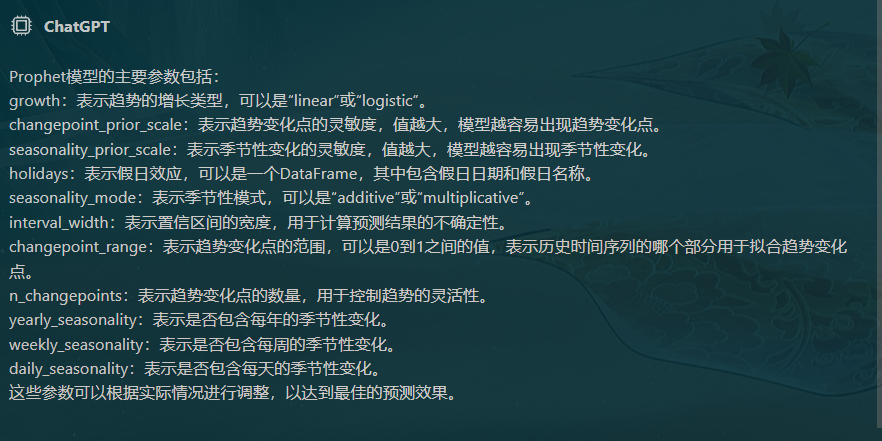

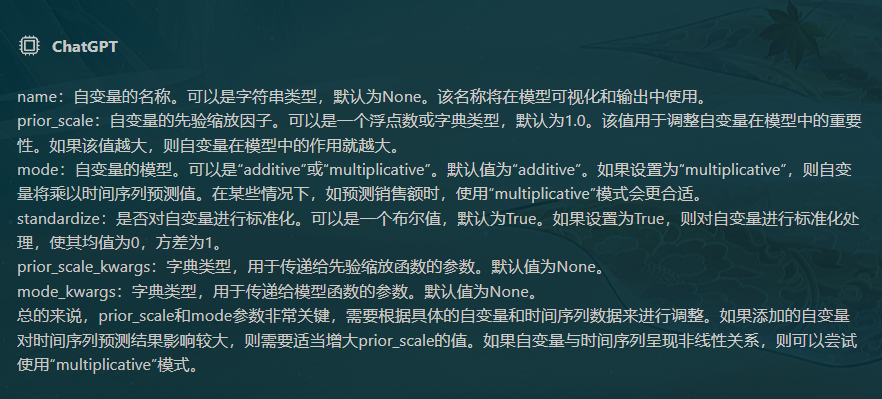

In [10]:
data = data.drop(columns=['wind_speed','wind_direction_angle','wind_direction'])

In [11]:
train = data.iloc[:-96]

test = data.iloc[-96:].reset_index(drop=True)
test['ds']  = pd.to_datetime(test['ds'])
test

,ds,y,weather_status,temperature,humidity,wind_level,pressure,visibility,precipitation,light
0,2023-02-26 00:00:00,4799.917216,0.000000,0.311151,0.659574,0.0,0.776398,0.160535,0.0,0.0
1,2023-02-26 00:15:00,4695.532192,0.000000,0.307914,0.678191,0.0,0.776398,0.160535,0.0,0.0
2,2023-02-26 00:30:00,4610.574016,0.000000,0.304676,0.696809,0.0,0.776398,0.160535,0.0,0.0
3,2023-02-26 00:45:00,4565.786848,0.000000,0.301439,0.715426,0.0,0.776398,0.160535,0.0,0.0
4,2023-02-26 01:00:00,4498.137376,0.454545,0.298561,0.734043,0.0,0.776398,0.153846,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
91,2023-02-26 22:45:00,5649.941920,0.000000,0.367806,0.625000,1.0,0.739130,0.170569,0.0,0.0
92,2023-02-26 23:00:00,5451.523744,0.000000,0.361511,0.638298,0.0,0.739130,0.150502,0.0,0.0
93,2023-02-26 23:15:00,5246.500000,0.000000,0.355216,0.651596,0.0,0.739130,0.150502,0.0,0.0
94,2023-02-26 23:30:00,5039.924704,0.000000,0.348921,0.664894,0.0,0.739130,0.150502,0.0,0.0


### 第一次训练模型（使用训练集训练）

In [12]:
fb.fit(train)

In [13]:
# df0为2月26号的数据，那这些数据来作为训练集
df0 = test.drop(columns='y')
df0 = df0.reset_index(drop=True)
df0


,ds,weather_status,temperature,humidity,wind_level,pressure,visibility,precipitation,light
0,2023-02-26 00:00:00,0.000000,0.311151,0.659574,0.0,0.776398,0.160535,0.0,0.0
1,2023-02-26 00:15:00,0.000000,0.307914,0.678191,0.0,0.776398,0.160535,0.0,0.0
2,2023-02-26 00:30:00,0.000000,0.304676,0.696809,0.0,0.776398,0.160535,0.0,0.0
3,2023-02-26 00:45:00,0.000000,0.301439,0.715426,0.0,0.776398,0.160535,0.0,0.0
4,2023-02-26 01:00:00,0.454545,0.298561,0.734043,0.0,0.776398,0.153846,0.0,0.0
...,...,...,...,...,...,...,...,...,...
91,2023-02-26 22:45:00,0.000000,0.367806,0.625000,1.0,0.739130,0.170569,0.0,0.0
92,2023-02-26 23:00:00,0.000000,0.361511,0.638298,0.0,0.739130,0.150502,0.0,0.0
93,2023-02-26 23:15:00,0.000000,0.355216,0.651596,0.0,0.739130,0.150502,0.0,0.0
94,2023-02-26 23:30:00,0.000000,0.348921,0.664894,0.0,0.739130,0.150502,0.0,0.0


In [14]:
pre =  fb.predict(df0)

In [15]:
pre.columns.values

array(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'daily', 'daily_lower', 'daily_upper',
       'extra_regressors_multiplicative',
       'extra_regressors_multiplicative_lower',
       'extra_regressors_multiplicative_upper', 'humidity',
       'humidity_lower', 'humidity_upper', 'light', 'light_lower',
       'light_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper',
       'precipitation', 'precipitation_lower', 'precipitation_upper',
       'pressure', 'pressure_lower', 'pressure_upper', 'temperature',
       'temperature_lower', 'temperature_upper', 'visibility',
       'visibility_lower', 'visibility_upper', 'weather_status',
       'weather_status_lower', 'weather_status_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'wind_level', 'wind_level_lower',
       'wind_level_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_uppe

In [16]:
pre[['ds','yhat']]


,ds,yhat
0,2023-02-26 00:00:00,4768.707147
1,2023-02-26 00:15:00,4617.460996
2,2023-02-26 00:30:00,4499.884180
3,2023-02-26 00:45:00,4417.586150
4,2023-02-26 01:00:00,4442.279658
...,...,...
91,2023-02-26 22:45:00,5325.332701
92,2023-02-26 23:00:00,5095.584511
93,2023-02-26 23:15:00,4850.950892
94,2023-02-26 23:30:00,4613.834323


In [17]:
test.iloc[:,:2]

,ds,y
0,2023-02-26 00:00:00,4799.917216
1,2023-02-26 00:15:00,4695.532192
2,2023-02-26 00:30:00,4610.574016
3,2023-02-26 00:45:00,4565.786848
4,2023-02-26 01:00:00,4498.137376
...,...,...
91,2023-02-26 22:45:00,5649.941920
92,2023-02-26 23:00:00,5451.523744
93,2023-02-26 23:15:00,5246.500000
94,2023-02-26 23:30:00,5039.924704


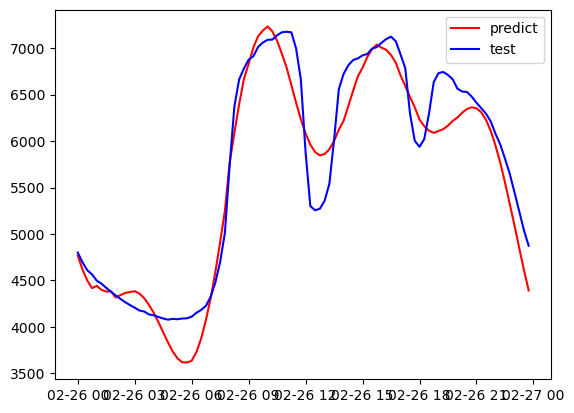

In [18]:
fig,ax = plt.subplots()
ax.plot(pre['ds'],pre['yhat'],color='r',label='predict')
ax.plot(test['ds'],test['y'],color='b',label='test')

plt.legend()
plt.show()



模型的绝对百分比误差

In [19]:
mape = abs((pre['yhat']-test['y'])/test['y']).mean()
mape

0.04265779636461651

拿最优参数重新拟合一个包含全部数据的模型，用来预测未来的电力负荷

### 第二次训练模型（全部数据训练）

In [20]:
model = Prophet(**best_params)
model.add_regressor('weather_status')
model.add_regressor('temperature')
model.add_regressor('humidity')
# fb.add_regressor('wind_speed')
model.add_regressor('wind_level')
# fb.add_regressor('wind_direction_angle')
# fb.add_regressor('wind_direction')
model.add_regressor('pressure')
model.add_regressor('visibility')
model.add_regressor('precipitation')
model.add_regressor('light')


In [21]:
model.fit(data)

生成要预测的未来数据

In [93]:
future = pd.date_range(start='2023-02-27',end='2023-02-28',freq='15min')

df_1 = pd.DataFrame({'ds':future})

df_2 = pd.DataFrame(columns={'weather_status', 'temperature', 'humidity',
                            'wind_level', 'pressure', 'visibility', 'precipitation',
                            'light'})

df_3 = pd.concat([df_1,df_2],axis=1)
df_3 = df_3.fillna(0)
df_3 = df_3.iloc[:-1]
df_4 = df_3.copy()
df_3

,ds,light,pressure,humidity,wind_level,precipitation,temperature,visibility,weather_status
0,2023-02-27 00:00:00,0,0,0,0,0,0,0,0
1,2023-02-27 00:15:00,0,0,0,0,0,0,0,0
2,2023-02-27 00:30:00,0,0,0,0,0,0,0,0
3,2023-02-27 00:45:00,0,0,0,0,0,0,0,0
4,2023-02-27 01:00:00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
91,2023-02-27 22:45:00,0,0,0,0,0,0,0,0
92,2023-02-27 23:00:00,0,0,0,0,0,0,0,0
93,2023-02-27 23:15:00,0,0,0,0,0,0,0,0
94,2023-02-27 23:30:00,0,0,0,0,0,0,0,0


只用时间，而其他特征全为0的情况下，预测结果偏差较大，性能并不好，所以我们需要将其他空缺的特征补全

我们可以先尝试，假设要预测的那天的天气状况与它的前三天变化不大，这种情况下我们就可以用前三天的数据来补全

In [24]:
time = ['2023-2-23','2023-2-24','2023-2-25','2023-2-26']
df_list = []
start_data = pd.Timestamp('2023-2-24')
for i in range(len(time)-1):
    start_data = time[i]
    end_data = time[i+1]
    df = data[(data['ds']>=start_data)&(data['ds']<end_data)]
    df_list.append(df)


# data[(data['ds']>=start_data)&(data['ds']<end_data)]


In [25]:
time_before_1 = df_list[2].reset_index(drop=True)
time_before_2 = df_list[1].reset_index(drop=True)
time_before_3 = df_list[0].reset_index(drop=True)

In [26]:
for i in df_3.columns.values[1:]:
    df_3[i] = (time_before_1[i] + time_before_2[i] + time_before_3[i])/3
df_3

,ds,light,pressure,humidity,wind_level,precipitation,temperature,visibility,weather_status
0,2023-02-27 00:00:00,0.0,0.722567,0.670213,0.666667,0.0,0.353717,0.136009,0.303030
1,2023-02-27 00:15:00,0.0,0.722567,0.675532,0.666667,0.0,0.350540,0.136009,0.303030
2,2023-02-27 00:30:00,0.0,0.722567,0.680851,0.666667,0.0,0.347362,0.136009,0.303030
3,2023-02-27 00:45:00,0.0,0.722567,0.686170,0.666667,0.0,0.344185,0.136009,0.303030
4,2023-02-27 01:00:00,0.0,0.724638,0.691489,0.333333,0.0,0.341127,0.132664,0.303030
...,...,...,...,...,...,...,...,...,...
91,2023-02-27 22:45:00,0.0,0.743271,0.618794,0.686275,0.0,0.361990,0.161650,0.272727
92,2023-02-27 23:00:00,0.0,0.745342,0.631206,0.666667,0.0,0.356715,0.144928,0.151515
93,2023-02-27 23:15:00,0.0,0.745342,0.638298,0.666667,0.0,0.352938,0.144928,0.151515
94,2023-02-27 23:30:00,0.0,0.745342,0.645390,0.666667,0.0,0.349161,0.144928,0.151515


In [27]:
forecast = model.predict(df_3)
forecast[['ds','yhat']]

,ds,yhat
0,2023-02-27 00:00:00,4212.280531
1,2023-02-27 00:15:00,4041.302907
2,2023-02-27 00:30:00,3904.208627
3,2023-02-27 00:45:00,3802.618784
4,2023-02-27 01:00:00,3743.777053
...,...,...
91,2023-02-27 22:45:00,5240.896748
92,2023-02-27 23:00:00,4995.719797
93,2023-02-27 23:15:00,4767.582543
94,2023-02-27 23:30:00,4547.118773


<AxesSubplot:xlabel='ds'>

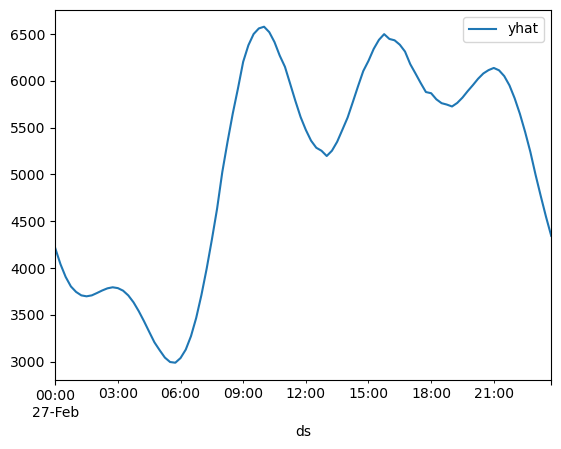

In [28]:
forecast[['ds','yhat']].plot(x='ds',y='yhat')

### 寻找最优天数的数据来补全要预测数据特征的缺失

实验结果还不错，但是这还不是最优解  
接下来我们需要做的是尝试几种不同的方法，比方说拿前几天的均值、中位数来测试，而此时，我们就应该在测试集上操作

In [116]:
def dfcompletion(df_future,data,day):
    '''
    df_future : 一天的数据,15分组一条,共96条数据 我默认了这个表特征和data是一样的只是缺少数据
    data : 已有的数据
    day : 要用几天的数据
    '''
    # 将时间列转化成时间戳
    df_future['ds'] = pd.to_datetime(df_future['ds'])
    data['ds'] = pd.to_datetime(data['ds'])

    # 计算day天前的时间点
    start_data = df_future['ds'].min() - pd.Timedelta(days=day-1)

    #找到所有strat_date之后且与df_future中时间点相同的数据
    df_new = pd.DataFrame(data=None,columns=df_4.columns)
    for i in range(len(df_4['ds'])):
        match_data = data[data['ds'].dt.time == df_4['ds'].dt.time.iloc[i]].copy()
        match_data = match_data[match_data['ds'] >= start_data].reset_index(drop=True)
        df_new = pd.concat([df_new,match_data])
    #按时刻分组，计算每个分组的均值和中位数
    mean_data = df_new.groupby(df_new['ds'].dt.time).mean().reset_index(drop=True) # 均值
    median_data =df_new.groupby(df_new['ds'].dt.time).median().reset_index(drop=True) # 中位数
    
    df_mean = df_future.copy()
    df_median = df_future.copy()
    # 数据的更新
    for i in df_future.columns.values[1:]:
        df_mean[i] = mean_data[i]
        df_median[i] = median_data[i]

    return df_mean,df_median


In [122]:
test_new = test.copy()
test_new = test_new.drop(columns='y')
test_new.iloc[:,1:] = 0
test_new

,ds,weather_status,temperature,humidity,wind_level,pressure,visibility,precipitation,light
0,2023-02-26 00:00:00,0,0,0,0,0,0,0,0
1,2023-02-26 00:15:00,0,0,0,0,0,0,0,0
2,2023-02-26 00:30:00,0,0,0,0,0,0,0,0
3,2023-02-26 00:45:00,0,0,0,0,0,0,0,0
4,2023-02-26 01:00:00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
91,2023-02-26 22:45:00,0,0,0,0,0,0,0,0
92,2023-02-26 23:00:00,0,0,0,0,0,0,0,0
93,2023-02-26 23:15:00,0,0,0,0,0,0,0,0
94,2023-02-26 23:30:00,0,0,0,0,0,0,0,0


In [143]:
def test_picture(df,day):
    df_mean,df_median = dfcompletion(df,data=data,day=day)
    pre_mean = model.predict(df_mean)
    pre_median = model.predict(df_median)
    
    fig,ax = plt.subplots()
    plt.rcParams['font.family'] = 'Microsoft YaHei'
    ax.plot(pre_mean['ds'],pre_mean['yhat'],color='r',label='mean')
    ax.plot(pre_median['ds'],pre_median['yhat'],color='b',label='median')
    ax.plot(test['ds'],test['y'],color='g',label='test')
    fig.suptitle('使用%d天数据'%day)

    plt.legend()
    plt.show()

    mape_mean = abs((pre_mean['yhat']-test['y'])/test['y']).mean()
    mape_median = abs((pre_median['yhat']-test['y'])/test['y']).mean()

    return mape_mean,mape_median
    

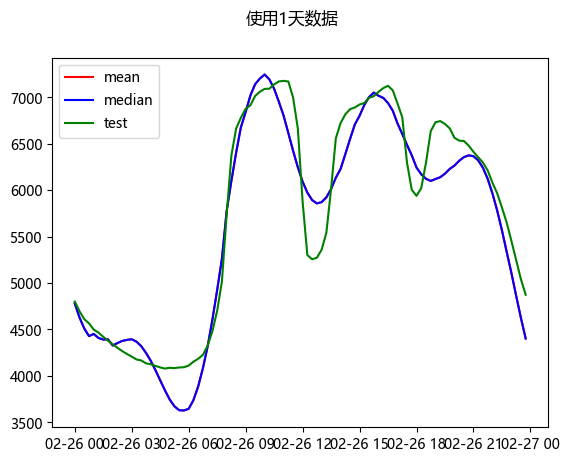

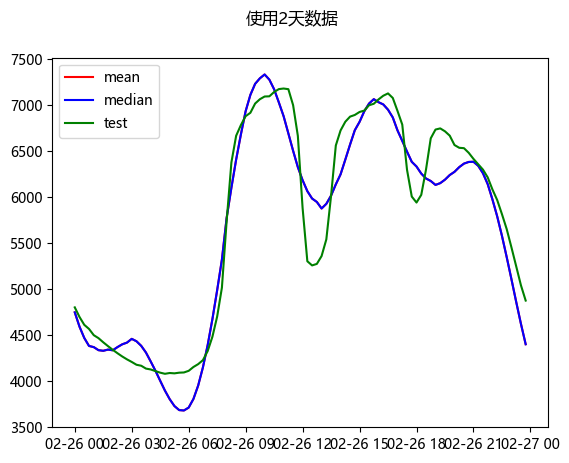

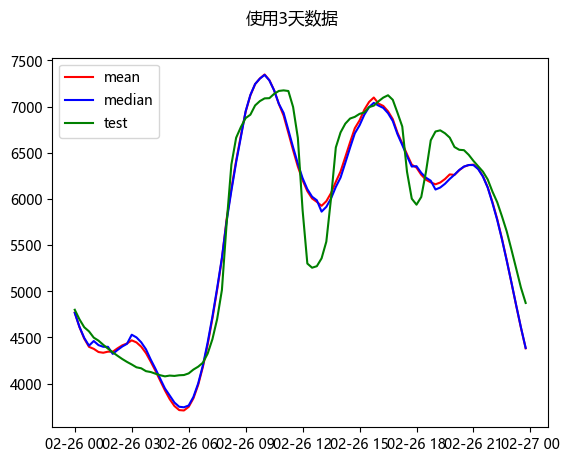

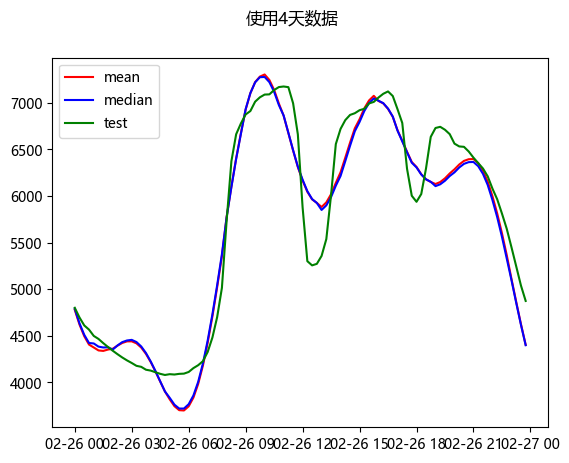

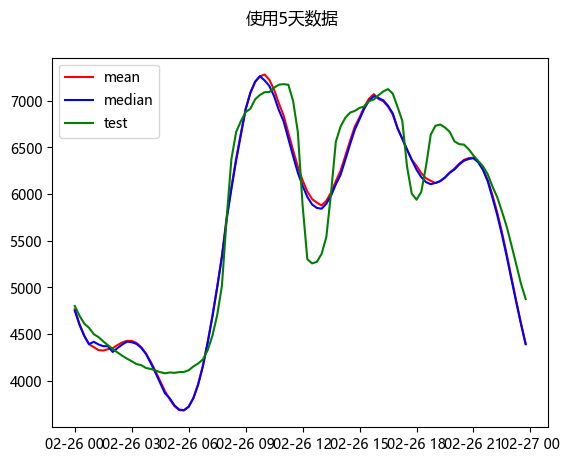

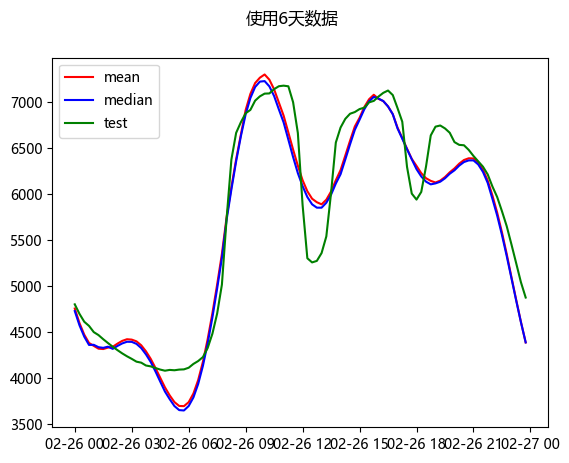

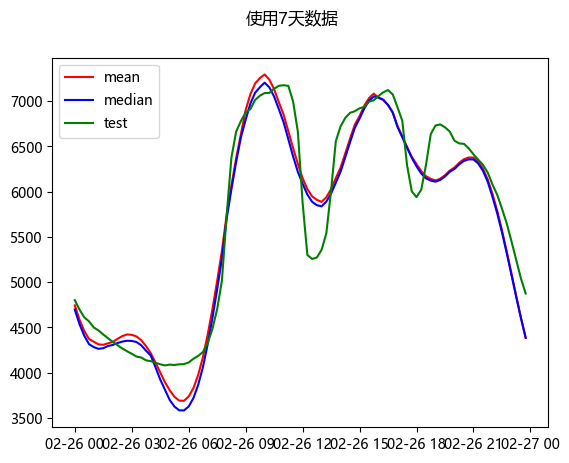

In [145]:
result = []
day = range(1,8)
for i in day:
    lis = []
    mape_mean,mape_median = test_picture(test_new,day=i)
    lis.append(i)
    lis.append(mape_mean)
    lis.append(mape_median)

    result.append(lis)
    

In [153]:
res = pd.DataFrame(data=result,columns=['day','mean_mape','median_mape'])
res

,day,mean_mape,median_mape
0,1,0.041991,0.041991
1,2,0.043168,0.043168
2,3,0.043070,0.043113
3,4,0.042282,0.042833
4,5,0.042791,0.042796
5,6,0.042609,0.043634
6,7,0.043019,0.045370


由上面结果可以看出，取前一天数据的mape最小，所以，我们可以将26号的数据直接赋予27号进行预测

In [154]:
df_4

,ds,light,pressure,humidity,wind_level,precipitation,temperature,visibility,weather_status
0,2023-02-27 00:00:00,0,0,0,0,0,0,0,0
1,2023-02-27 00:15:00,0,0,0,0,0,0,0,0
2,2023-02-27 00:30:00,0,0,0,0,0,0,0,0
3,2023-02-27 00:45:00,0,0,0,0,0,0,0,0
4,2023-02-27 01:00:00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
91,2023-02-27 22:45:00,0,0,0,0,0,0,0,0
92,2023-02-27 23:00:00,0,0,0,0,0,0,0,0
93,2023-02-27 23:15:00,0,0,0,0,0,0,0,0
94,2023-02-27 23:30:00,0,0,0,0,0,0,0,0


In [159]:
test

,ds,y,weather_status,temperature,humidity,wind_level,pressure,visibility,precipitation,light
0,2023-02-26 00:00:00,4799.917216,0.000000,0.311151,0.659574,0.0,0.776398,0.160535,0.0,0.0
1,2023-02-26 00:15:00,4695.532192,0.000000,0.307914,0.678191,0.0,0.776398,0.160535,0.0,0.0
2,2023-02-26 00:30:00,4610.574016,0.000000,0.304676,0.696809,0.0,0.776398,0.160535,0.0,0.0
3,2023-02-26 00:45:00,4565.786848,0.000000,0.301439,0.715426,0.0,0.776398,0.160535,0.0,0.0
4,2023-02-26 01:00:00,4498.137376,0.454545,0.298561,0.734043,0.0,0.776398,0.153846,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
91,2023-02-26 22:45:00,5649.941920,0.000000,0.367806,0.625000,1.0,0.739130,0.170569,0.0,0.0
92,2023-02-26 23:00:00,5451.523744,0.000000,0.361511,0.638298,0.0,0.739130,0.150502,0.0,0.0
93,2023-02-26 23:15:00,5246.500000,0.000000,0.355216,0.651596,0.0,0.739130,0.150502,0.0,0.0
94,2023-02-26 23:30:00,5039.924704,0.000000,0.348921,0.664894,0.0,0.739130,0.150502,0.0,0.0


In [162]:
df = pd.concat([df_4['ds'],test.iloc[:,2:]],axis=1)
df

,ds,weather_status,temperature,humidity,wind_level,pressure,visibility,precipitation,light
0,2023-02-27 00:00:00,0.000000,0.311151,0.659574,0.0,0.776398,0.160535,0.0,0.0
1,2023-02-27 00:15:00,0.000000,0.307914,0.678191,0.0,0.776398,0.160535,0.0,0.0
2,2023-02-27 00:30:00,0.000000,0.304676,0.696809,0.0,0.776398,0.160535,0.0,0.0
3,2023-02-27 00:45:00,0.000000,0.301439,0.715426,0.0,0.776398,0.160535,0.0,0.0
4,2023-02-27 01:00:00,0.454545,0.298561,0.734043,0.0,0.776398,0.153846,0.0,0.0
...,...,...,...,...,...,...,...,...,...
91,2023-02-27 22:45:00,0.000000,0.367806,0.625000,1.0,0.739130,0.170569,0.0,0.0
92,2023-02-27 23:00:00,0.000000,0.361511,0.638298,0.0,0.739130,0.150502,0.0,0.0
93,2023-02-27 23:15:00,0.000000,0.355216,0.651596,0.0,0.739130,0.150502,0.0,0.0
94,2023-02-27 23:30:00,0.000000,0.348921,0.664894,0.0,0.739130,0.150502,0.0,0.0


In [164]:
predict = model.predict(df)

In [166]:
predict[['ds','yhat']]

,ds,yhat
0,2023-02-27 00:00:00,4214.083018
1,2023-02-27 00:15:00,4052.747962
2,2023-02-27 00:30:00,3925.296285
3,2023-02-27 00:45:00,3833.349081
4,2023-02-27 01:00:00,3847.620424
...,...,...
91,2023-02-27 22:45:00,5196.740429
92,2023-02-27 23:00:00,4986.530136
93,2023-02-27 23:15:00,4761.331925
94,2023-02-27 23:30:00,4543.807209


<AxesSubplot:xlabel='ds'>

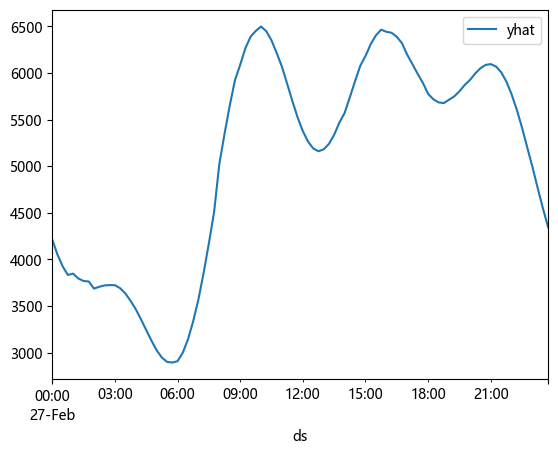

In [167]:
predict[['ds','yhat']].plot(x='ds',y='yhat')